<a href="https://colab.research.google.com/github/shahlafakouri/ShahlaFakouri2023/blob/main/CVass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://stackoverflow.com/questions/52312053/how-to-combine-the-phase-of-one-image-and-magnitude-of-different-image-into-1-im
# https://stackoverflow.com/questions/60073076/how-to-find-phase-spectrum-of-an-image-in-opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 1: Import necessary libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt

#step2: Read and convert the image
img=cv2.imread('/content/drive/MyDrive/CV/Earth.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


#Step 3: Compute the Fourier Transform (FT) and shift the frequency components
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

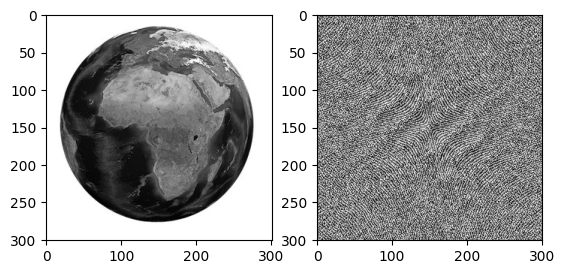

In [ ]:
# step 4: Get phase response

phase_spectrum = np.angle(dft_shift)

#step 5: Display the original image and the phase spectrum
ax1 = plt.subplot(1,2,1)
ax1.imshow(img, cmap='gray')

ax2 = plt.subplot(1,2,2)
ax2.imshow(phase_spectrum, cmap='gray')

plt.show()

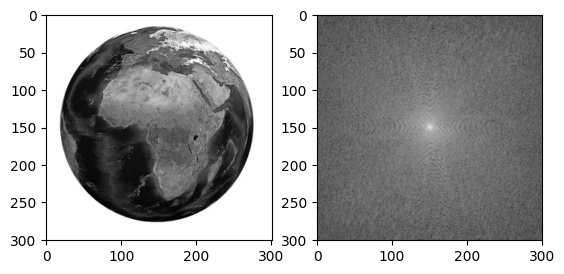

In [ ]:
#step 6:  Get magnitude response

magnitude_spectrum = 20*np.log(np.abs(dft_shift))
# magnitude_spectrum = np.abs(dft_shift)
# magnitude_spectrum = np.abs(dft)


# Step 7: Display the original image and the magnitude spectrum
ax1 = plt.subplot(1,2,1)
ax1.imshow(img, cmap='gray')

ax2 = plt.subplot(1,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')

plt.show()

In [ ]:
# img_back=np.fft.ifft2(np.fft.ifftshift(dft_shift))
# plt.figure(figsize=(20,6))
# plt.subplot(133)
# plt.imshow( np.abs(img_back),cmap='gray')
# plt.title('reconstructed')
# plt.colorbar();

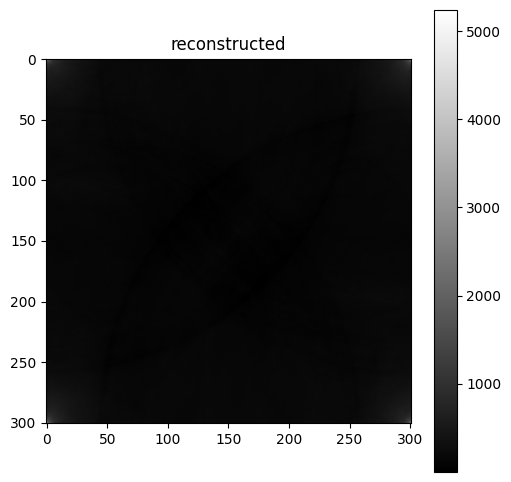

In [ ]:
#step8: Reconstruct the image from the magnitude response
img_back=np.fft.ifft2(np.fft.ifftshift(np.abs(dft_shift)))
# img_back=np.fft.ifft2(np.fft.ifftshift(magnitude_spectrum))


# step 9: Display the reconstructed image from the magnitude response
plt.figure(figsize=(20,6))
plt.subplot(133)
plt.imshow( np.abs(img_back),cmap='gray')
plt.title('reconstructed')
plt.colorbar();

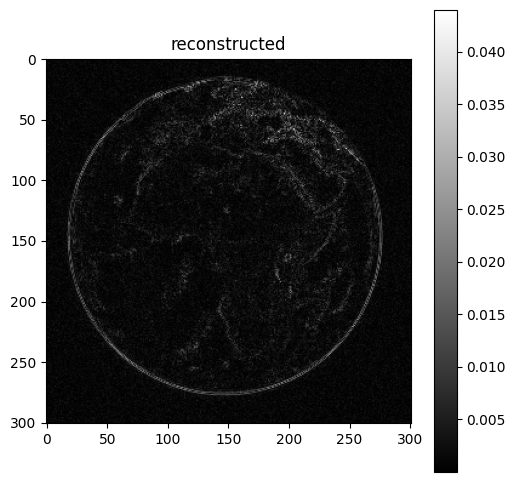

In [ ]:
# Step 10: Reconstruct the image from the phase response
img_back=np.fft.ifft2(np.fft.ifftshift(np.exp(1j*np.angle(dft))))
# img_back=np.fft.ifft2(np.fft.ifftshift(phase_spectrum))

#Step 11: Display the reconstructed image from the phase response
plt.figure(figsize=(20,6))
plt.subplot(133)
plt.imshow( np.abs(img_back),cmap='gray')
plt.title('reconstructed')
plt.colorbar();

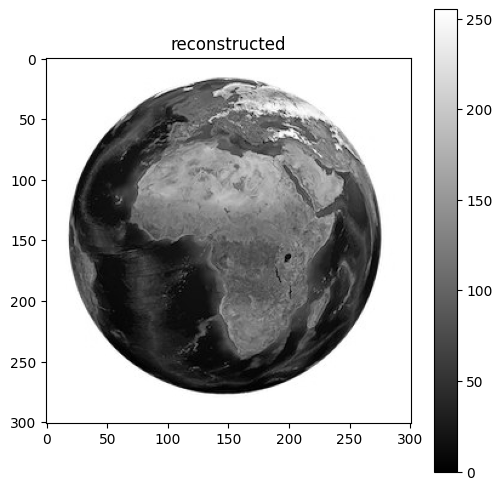

In [ ]:
# Step 12: Reconstruct the image from both magnitude and phase response

# combined = np.multiply(magnitude_spectrum, phase_spectrum)
combined = np.multiply(np.abs(dft), np.exp(1j*np.angle(dft)))

img_back=np.fft.ifft2(np.fft.ifftshift(combined))

#Step 13: Display the reconstructed image from both magnitude and phase response
plt.figure(figsize=(20,6))
plt.subplot(133)
plt.imshow( np.abs(img_back),cmap='gray')
plt.title('reconstructed')
plt.colorbar();

Question 1

In [ ]:
# https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381

In [ ]:
#Step 1: Define the convolve2D function
def convolve2D(image, kernel, padding=0, strides=1):

    # Step 2: Perform Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Step 3: Gather shapes of image, kernel, and padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Step 4: Compute the shape of the output convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Step 5: Apply equal padding to all sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        # print(imagePadded)
    else:
        imagePadded = image

    # Step 6: Iterate through the image and perform convolution
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
    # Step 7: Return the output convolution
    return output

In [ ]:
# Step 8: Define the processImage function
def processImage(image):
  image = cv2.imread(image)
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
  return image

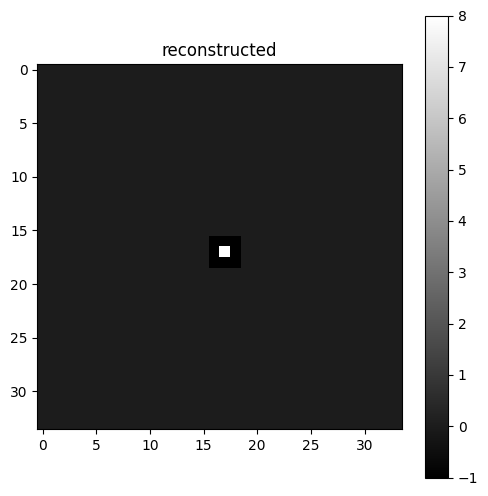

In [ ]:
import cv2
import numpy as np
from scipy import signal

# Grayscale Image
# Step 9: Create a grayscale image or load an image
image = signal.unit_impulse((32, 32), 'mid')

# Step 10: Define the edge detection kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Step 11: Perform 2D convolution and save the output
output = convolve2D(image, kernel, padding=2)
cv2.imwrite('2DConvolved.jpg', output)

# Step 12: Display the reconstructed image
plt.figure(figsize=(20,6))
plt.subplot(133)
plt.imshow(output ,cmap='gray')
plt.title('reconstructed')
plt.colorbar();